In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
def show_image(img):
  plt.imshow(img, cmap='binary')

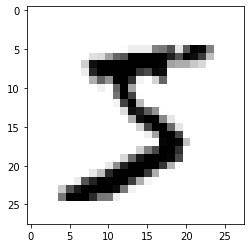

In [ ]:
show_image(X_train[0])

In [ ]:
#layer encoder
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential

encoder = Sequential()
encoder.add(Flatten(input_shape=[28, 28]))
encoder.add(Dense(256, activation='relu'))
encoder.add(Dense(64, activation='relu'))
encoder.add(Dense(30, activation='relu')) #latent

In [ ]:
# layer decoder
decoder = Sequential()
decoder.add(Dense(64, activation='relu'))
decoder.add(Dense(256, activation='relu'))
decoder.add(Dense(28*28, activation='sigmoid')) #karena piksel gambar saling independen
decoder.add(Reshape([28,28]))

In [ ]:
autoencoder = Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

In [ ]:
autoencoder.compile(loss='binary_crossentropy',
                    optimizer='rmsprop')

In [ ]:
autoencoder.fit(X_train, X_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 4ms/step - loss: 0.1467
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1107
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1033
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0996
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0972
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0956
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0944
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0935
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0928
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0922


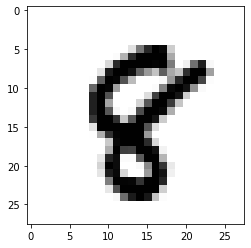

In [ ]:
data_test = X_test[146]
show_image(data_test)

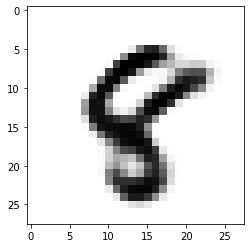

In [ ]:
pred = autoencoder.predict(data_test.reshape((1,28,28)))
show_image(pred.reshape(28,28))

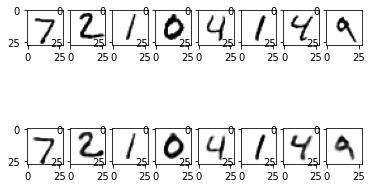

In [ ]:
for i in range(8):
  plt.subplot(2,8, i+1);
  pred = autoencoder.predict(X_test[i].reshape((1,28,28)))
  show_image(X_test[i])

  plt.subplot(2,8, i+9);
  show_image(pred.reshape(28,28))

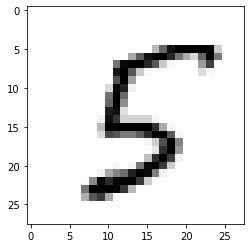

In [ ]:
# eksperimen
idx = 23
show_image(X_test[idx])

In [ ]:
latent_vector = encoder.predict(X_test[idx].reshape((1,28,28)))
latent_vector

array([[2.1869383 , 0.        , 2.2843907 , 0.14014529, 5.9794235 ,
        0.86436874, 2.8510559 , 0.54036707, 1.3283668 , 4.6999874 ,
        3.0617893 , 4.3695855 , 2.6405644 , 2.6373842 , 1.2003388 ,
        1.1354733 , 3.170471  , 1.6236975 , 3.6629024 , 3.3040776 ,
        5.8383093 , 2.2108233 , 0.        , 0.70594925, 1.3721684 ,
        6.603906  , 0.79633707, 0.        , 2.0264    , 3.4010944 ]],
      dtype=float32)

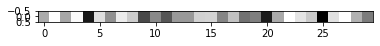

In [ ]:
show_image(latent_vector)

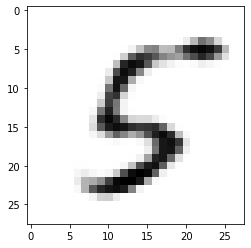

In [ ]:
res = decoder.predict(latent_vector)
show_image(res.reshape((28,28)))

In [ ]:
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPool2D, Conv2DTranspose
from tensorflow.keras.optimizers import SGD

tf.random.set_seed(42)
np.random.seed(42)

conv_encoder = Sequential([
    Reshape([28, 28, 1], input_shape=[28, 28]),
    Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    MaxPool2D(pool_size=2),
    Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    MaxPool2D(pool_size=2),
    Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    MaxPool2D(pool_size=2)
])
conv_decoder = Sequential([
    Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    Reshape([28, 28])
])
conv_ae = Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="binary_crossentropy", optimizer=SGD(lr=1.0))
history = conv_ae.fit(X_train, X_train, epochs=5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5
1875/1875 [==============================] - 18s 6ms/step - loss: 0.1086
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0809
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0768
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0746
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0733


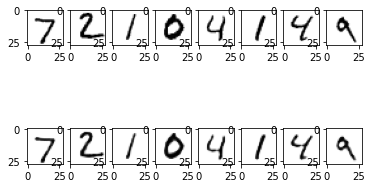

In [ ]:
for i in range(8):
  plt.subplot(2,8, i+1);
  pred = conv_ae.predict(X_test[i].reshape((1,28,28)))
  show_image(X_test[i])

  plt.subplot(2,8, i+9);
  show_image(pred.reshape(28,28))

## Denoising Autoencoder

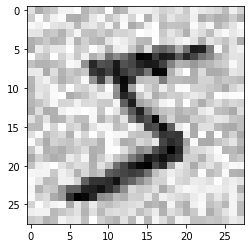

In [ ]:
import numpy as np
noise = np.random.random((28, 28))/2
show_image(X_train[0]+noise)

In [ ]:
X_train_noise = np.empty_like(X_train)
X_test_noise = np.empty_like(X_test)

for i in range(len(X_train)):
  X_train_noise[i] = X_train[i] + np.random.random((28,28))/2

for i in range(len(X_test)):
  X_test_noise[i] = X_test[i] + np.random.random((28,28))/2

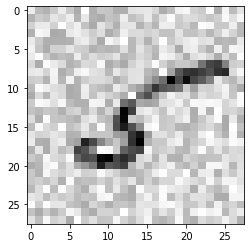

In [ ]:
show_image(X_train_noise[11])

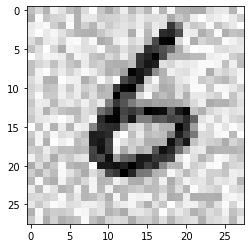

In [ ]:
show_image(X_train_noise[66])

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

conv_encoder = Sequential([
    Reshape([28, 28, 1], input_shape=[28, 28]),
    Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    MaxPool2D(pool_size=2),
    Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    MaxPool2D(pool_size=2),
    Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    MaxPool2D(pool_size=2)
])
conv_decoder = Sequential([
    Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    Reshape([28, 28])
])
conv_ae = Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="binary_crossentropy", optimizer=SGD(lr=1.0))
history = conv_ae.fit(X_train_noise, X_train, epochs=10)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1166
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0866
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0817
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0792
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0777
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0766
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0758
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0752
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0748
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0744


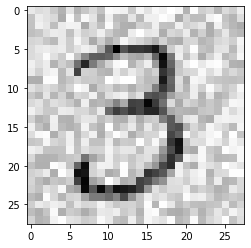

In [ ]:
new_data = X_test_noise[334]
show_image(new_data)

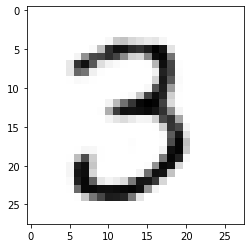

In [ ]:
res = conv_ae.predict(new_data.reshape((1,28,28)))
show_image(res.reshape((28,28)))

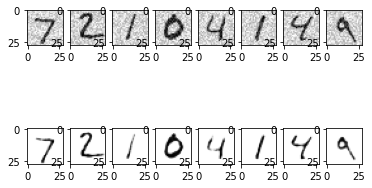

In [ ]:
for i in range(8):
  plt.subplot(2,8, i+1);
  pred = conv_ae.predict(X_test[i].reshape((1,28,28)))
  show_image(X_test_noise[i])

  plt.subplot(2,8, i+9);
  show_image(pred.reshape(28,28))